In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = r'D:\pic'


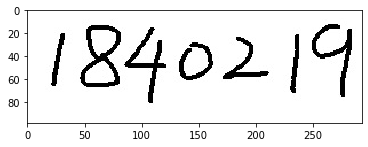

In [2]:
# imraw = plt.imread(os.path.join(path, 'recf.jpg'))

im = Image.open(os.path.join(path, r'simple.jpg'))

# w, h = im.size
# im.thumbnail((w, 28))
imraw = np.array(im)[:, :, 0]

plt.imshow(imraw, cmap=plt.cm.gray)
plt.show()


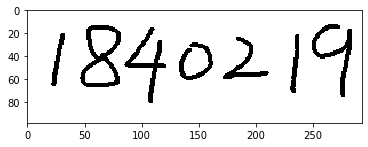

In [3]:
imsolid = np.where(imraw >= 128, 1, 0)
plt.imshow(imsolid, cmap=plt.cm.gray)
plt.show()

In [4]:
hnum = imsolid.shape[0]
vnum = imsolid.shape[1]

vvec = np.mean(imsolid, axis=0)
hvec = np.mean(imsolid, axis=1)


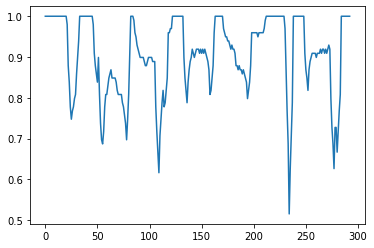

In [5]:
plt.plot(range(vnum),vvec)
plt.show()

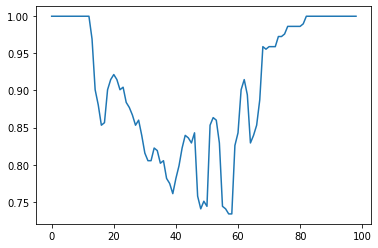

In [6]:
plt.plot(range(hnum),hvec)
plt.show()

In [14]:
vvec_valley = np.where(vvec > 0.9)[0]
vvec_peak = np.where(vvec < max(0.8, np.min(vvec) + 0.1))[0]

print(vvec_valley)
print(vvec_peak)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  81  82  83  84  85  86  87  88  89  90 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 141 142 144 145 146 147 148 149 150
 151 152 153 154 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 238 239 240 241 242 243 244 245 246 247 248 249 256 257
 258 259 261 262 263 264 265 266 267 268 269 270 271 272 273 284 285 286
 287 288 289 290 291 292]
[ 24  25  26  27  28  53  54  55  56  57  74  75  76  77  78  79 106 107
 108 109 110 111 112 114 115 136 194 232 233 234 235 236 237 274 275 276
 277 278 279 280 281 282]


In [15]:
valleys = []
valley_start = 0
for i in range(len(vvec_valley)):
    if i - valley_start != vvec_valley[i] - vvec_valley[valley_start]:
        valleys.append(int((vvec_valley[valley_start] + vvec_valley[i - 1]) / 2))
        valley_start = i

valleys.append(int((vvec_valley[valley_start] + vvec_valley[-1]) / 2))

peaks = []
peak_start = 0
for i in range(len(vvec_peak)):
    if i - peak_start != vvec_peak[i] - vvec_peak[peak_start]:
        peaks.append(int((vvec_peak[peak_start] + vvec_peak[i - 1]) / 2))
        peak_start = i

peaks.append(int((vvec_peak[peak_start] + vvec_peak[-1]) / 2))

print(valleys)
print(peaks)

peaks.append(vnum)
valleys = np.array(valleys)
peaks = np.array(peaks)
back = 0
splits = []
for front in peaks:
    choose = np.where((valleys >= back) & (valleys < front))[0]
    if len(choose) == 1:
        splits.append(valleys[choose[0]])
    if len(choose) > 1:
        middle = (front + back) / 2
        mindist = vnum
        bestvalley=-1
        for vl in valleys[choose]:
            curdist = abs(vl - middle)
            if curdist < mindist:
                bestvalley = vl
                mindist = curdist
        splits.append(bestvalley)
    print(choose)
    back = front
splits


[10, 39, 85, 125, 141, 149, 172, 214, 243, 257, 267, 288]
[26, 55, 76, 109, 114, 136, 194, 234, 278]
[0]
[1]
[]
[2]
[]
[3]
[4 5 6]
[7]
[ 8  9 10]
[11]


[10, 39, 85, 125, 172, 214, 257, 288]

4.180659670164918 11.962018990504747
6.858422939068101 11.421505376344086
5.25569227788005 12.634725317314214
5.778579513299378 12.576117713638936
4.332136445242369 13.134350688210652
6.8647297719462665 11.452983442674164
3.925154130702836 10.5845869297164


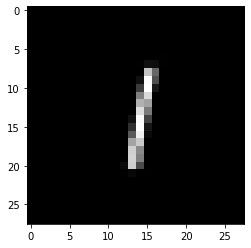

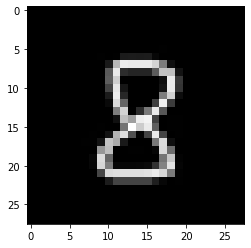

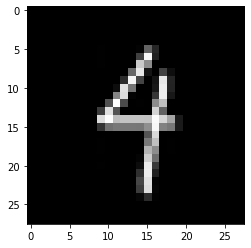

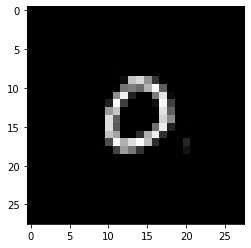

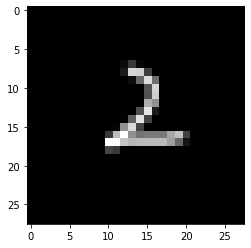

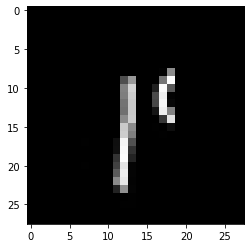

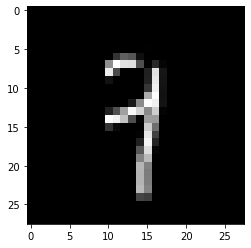

In [16]:
from PIL import ImageOps

splitted_im = []
regsize = 28

for i in range(len(splits) - 1):
    # if splits[i + 1] - splits[i] < hnum / 10:
    #     continue
    curimg = im.crop((splits[i], 0, splits[i + 1], hnum))
    curimg.thumbnail((100, regsize))
    arrayed = np.array(curimg)[:, :, 0]
    factor = 255 / np.max(arrayed)
    arrayed = 255 - arrayed * factor
    curimg = Image.fromarray(arrayed)
    # curimg.show()

    # 求重心
    curw = arrayed.shape[1]
    sumxw = 0
    sumyw = 0
    sumw = 0
    for i in range(regsize):
        for j in range(curw):
            sumxw += j * arrayed[i][j]
            sumyw += i * arrayed[i][j]
            sumw += arrayed[i][j]
    xcenter = sumxw / sumw
    ycenter = sumyw / sumw
    print(xcenter, ycenter)
    # leftpadding = int((regsize - curw) / 2)
    # rightpadding = regsize - curw - leftpadding
    padcurimg = curimg.crop((xcenter - regsize / 2, 
                             ycenter - regsize / 2, 
                             xcenter + regsize / 2, 
                             ycenter + regsize / 2))
    
    splitted_im.append(np.array(padcurimg))

for img in splitted_im:
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()


In [17]:
netimages = []
for img in splitted_im:
    netimages.append(img.flatten())
netimages = np.array(netimages)
# print(netimages[1])

In [18]:
import tensorflow as tf

sess = tf.Session()

model_file = tf.train.latest_checkpoint(r'D:\pic\net2')
saver = tf.train.import_meta_graph(model_file + '.meta')

saver.restore(sess, model_file)
graph = tf.get_default_graph()

# for op in graph.get_operations():
#     print(op.name)

x = graph.get_tensor_by_name("x:0")
y = graph.get_tensor_by_name("y:0")
keep = graph.get_tensor_by_name("keep:0")


INFO:tensorflow:Restoring parameters from D:\pic\net2\predictmodel.ckpt-19999


In [26]:
result_test = sess.run(y, feed_dict={x: netimages, keep: 0.5})
np.argmax(result_test,axis=1)

array([1, 8, 4, 9, 2, 8, 7], dtype=int64)

In [22]:
result_test

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)